In [1]:
##### Fall 2019 Deep Learning Problem 2 Dataset #####

# Apply your code on the toy dataset, which has 40 points.

# The data points are in 4-D. 

# The dataset have 4 classes in total, which are denoted by 0, 1, 2, 3 in Y for each class.

# The following Python code can be used to load the data for each data set specified by the "dataind".

import numpy as np
import matplotlib.pyplot as plt

svpath = './Q2_data.npz'
data = np.load(svpath)

# X, array of shape [n_samples, n_features]
# Y, array of shape [n_samples]
X = data['X']
Y = data['Y']

samples = X.shape[0]
features = X.shape[1]

In [12]:
class LinearModel:
    def __init__(self, a, b): #set the iterations and the descent rate
        super().__init__() 
        self.epochs = a
        self.rate = b
    def forward(self, X, W, b):
        return np.add(np.dot(W, X),  b)
    def train(self, X: np.ndarray, y: np.ndarray):
        classes = np.unique(y).size
        W = np.zeros([classes, X.shape[0]])
        b = np.zeros([classes, 1])
        one_hot_y = np.zeros([classes, y.shape[0]]) #one hot encoding of y
        losses = np.zeros(self.epochs)
        acc = np.zeros(self.epochs)
        
        for i in range(y.shape[0]):
            one_hot_y[int(y[i])][i] = 1
        
        for i in range(self.epochs):
            y_hat = self.forward(X, W, b)
            outputs = self.softmax_func(y_hat)
            w_grad, b_grad = self.grad(X, one_hot_y, b, outputs)
            W -= self.rate*w_grad
            b -= self.rate*b_grad
            losses[i] = self.loss(outputs, one_hot_y)
            acc[i] = self.classification_accuracy(W, X, b, y)
        self.plot(losses, acc)
            
    def softmax_func(self, y_hat):
        return np.exp(y_hat) / np.sum(np.exp(y_hat), axis=0)
        
    def predict(self, W:np.ndarray, X: np.ndarray, b:np.ndarray):
        y_hat = self.forward(X, W, b)
        outputs = self.softmax_func(y_hat)
        return np.argmax(outputs, axis = 0)

    def loss(self, outputs: np.ndarray, y: np.ndarray):
        # Using KL divergence as loss, but entropy is 0 because the entropy of the true label is 0, thus we are only left
        # with the cross entropy calculated below
        outputs[outputs == 0] = 0.00001
        return -(np.sum(y*np.log(outputs)))

    def grad(self, X: np.ndarray, y: np.ndarray, b: np.ndarray, outputs): 
        # Use backpropagation dE/dw = dE/dy dy/dw, where E is the outputed cost, y is the prediction
        samples = X.shape[1]
        grad_e_y = -(y - outputs) # y = WX + b
        grad_y_w = X
        grad_e_w = (1/samples) * np.dot(grad_e_y, np.transpose(X)) #average across all samples
        grad_y_b = 1
        grad_e_b = (1/samples) * np.sum(grad_e_y, axis=1) #average across all samples
        print(grad_e_y.shape)
        return grad_e_w, grad_e_b.reshape(grad_e_b.shape[0], 1)
    
    def classification_accuracy(self, W:np.ndarray, X: np.ndarray, b:np.ndarray, y: np.ndarray):
        pred = self.predict(W, X, b)
        samples = y.shape[0]
        count = 0
        for i in range(samples):
            if pred[i] == y[i]:
                count = count + 1
        return count/samples
    
    def plot(self, loss:np.ndarray, acc:np.ndarray):
        
        plt.plot(acc)
        plt.title('Accuracy per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('%Accuracy')
        plt.show()
        
        plt.plot(loss)
        plt.title('Loss per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
        print('Accuracy: ' + str(acc[-1]*100) + '%')
    

(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)
(4, 40)


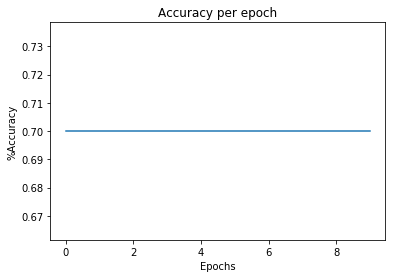

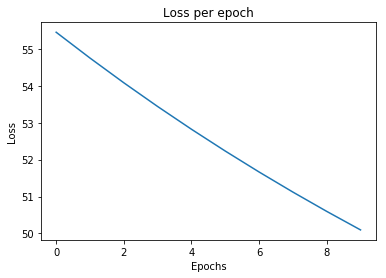

Accuracy: 70.0%


In [13]:
model = LinearModel(10, 0.1)
a = model.train(np.transpose(X),Y)